# Rainfall time-series dataset released by WFP 

The data regarding the rainfall are provided to the wfp: https://dataviz.vam.wfp.org/seasonal_explorer/rainfall_vegetation/visualizations#

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
from plotly_dataframe import plot, plot_hist
from plot_map import draw_admin
import pandas as pd
import ntpath
import glob

In [2]:
# Define the path where the results arising from this analysis will be saved.
path_to_save_data = "./time-series/"

# Month dekad granularity data - YEM, SYR, BFA

The rainfall data of three countries have been downloaded: *Yemen* (YEM), *Syria* (SYR) and *Burkina Faso* (BFA). These countries have been chosen according to the data of the FCS & rCSI indicators. The Nigeria data aren't been downloaded beacuse the rainfall data doesn't have the same administrative division of the FCS & rCSI indicators.

The files downloaded are that selected with "all" from the site.

In [3]:
# Read the data released by wfp regarding the rainfall in the adminstratas of the selected countries.
path = "./wfp_data/Rainfall/"
all_folders = glob.glob(path + "*")

dfs = []

for folder in all_folders:
    country = ntpath.basename(folder).split(".")[0]
    all_subfolders = glob.glob(path + country + "/*")
    for subfolder in all_subfolders:
        adminstrata = ntpath.basename(subfolder).split(".")[0]
        # All the files of the years.
        all_files = glob.glob(subfolder + "/*.csv")
        for filename in all_files:
            df = pd.read_csv(filename)
            df["AdminStrata"] = adminstrata
            df["Country"] = country
            dfs.append(df)

In [4]:
print("The data released by wfp:")
df = pd.concat(dfs, axis = 0, ignore_index = True)
df.head()

The data released by wfp:


,Year,Month,Dekad,Rainfall (mm),Average (mm),AdminStrata,Country
0,2014,1,1,0.000,0.0,Boucle-Du-Mouhoun,Burkina Faso
1,2014,1,2,0.000,0.0,Boucle-Du-Mouhoun,Burkina Faso
2,2014,1,3,0.000,0.0,Boucle-Du-Mouhoun,Burkina Faso
3,2014,2,1,0.000,0.0,Boucle-Du-Mouhoun,Burkina Faso
4,2014,2,2,0.001,0.0,Boucle-Du-Mouhoun,Burkina Faso


### Brief items description

- *Year*: reference year of the data collection.
- *Month*: reference month of the data collection.
- *Dekad*: reference month dekad of the data collection: these correspond to the calendar dates 1-10, 11-20, and 21-end of each month.
- *Rainfall (mm)*: rainfall amount in the reference period.
- *Average (mm)*: long-term rainfall average for the same period starting from 1994 to 2013.
- *AdminStrata*: the adminstrata information of the reference country.
- *Country*: the country information.

In [5]:
# Delete the duplicate rows of the dataframe (some date have duplicate information due to loading data from different files).
df.drop_duplicates(inplace = True)

### Country item

In [6]:
print("The countries are:", ", ".join(df.Country.unique()))

The countries are: Burkina Faso, Syria, Yemen


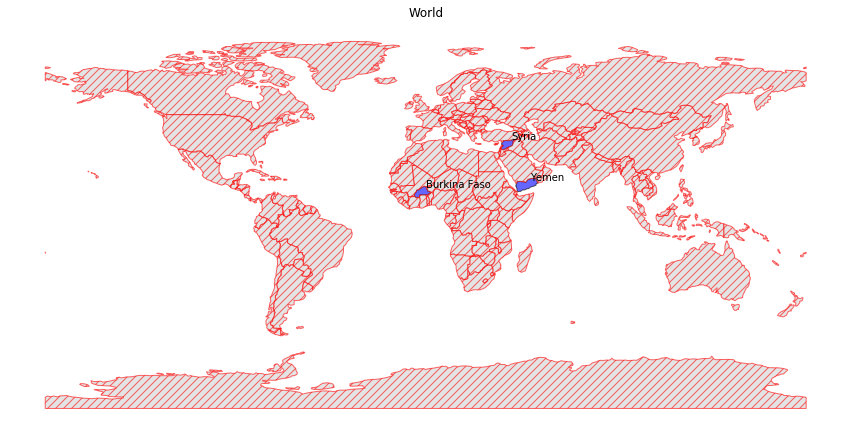

In [7]:
draw_admin("World", df.Country.unique(), figsize = (15, 9), annotation = True, annotation_selected = True)

### AdminStrata item

In [8]:
# Rename the name of some AdminStrata of Syria according to the fcs and rcsi names of the AdminStrata.
df.replace(["Al-Hasekeh"], ["Al-Hasakeh"], inplace = True)

In [9]:
AdminStratas = df.groupby("Country")["AdminStrata"].unique()

- **Yemen**: the administrative division of Yemen is divided into two main divisions (governorates and districts). There are 22 governorates, including the capital Sana'a (Amanat Al Asimah) and Socotra Archipelago. The rainfall dataframe has the values of all the governorates.

In [10]:
print(AdminStratas["Yemen"].shape)
AdminStratas["Yemen"]

(22,)


array(['Abyan', 'Aden', 'Al Bayda', "Al Dhale'e", 'Al Hudaydah',
       'Al Jawf', 'Al Maharah', 'Al Mahwit', 'Amanat Al Asimah', 'Amran',
       'Dhamar', 'Hadramaut', 'Hajjah', 'Ibb', 'Lahj', 'Marib', 'Raymah',
       "Sa'ada", "Sana'a", 'Shabwah', 'Socotra', 'Taizz'], dtype=object)

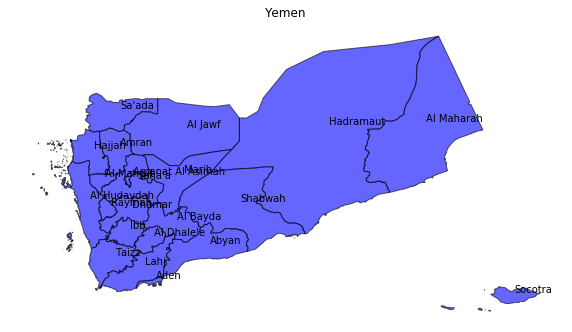

In [11]:
draw_admin("Yemen", AdminStratas["Yemen"], figsize = (10, 7), annotation = True)

- **Syria**: the governatores of the Syria country are 14. The rainfall dataframe has the values of all the governorates.

In [12]:
print(AdminStratas["Syria"].shape)
AdminStratas["Syria"]

(14,)


array(['Al-Hasakeh', 'Aleppo', 'Ar-Raqqa', 'As-Sweida', 'Damascus',
       "Dar'a", 'Deir-ez-Zor', 'Hama', 'Homs', 'Idleb', 'Lattakia',
       'Quneitra', 'Rural Damascus', 'Tartous'], dtype=object)

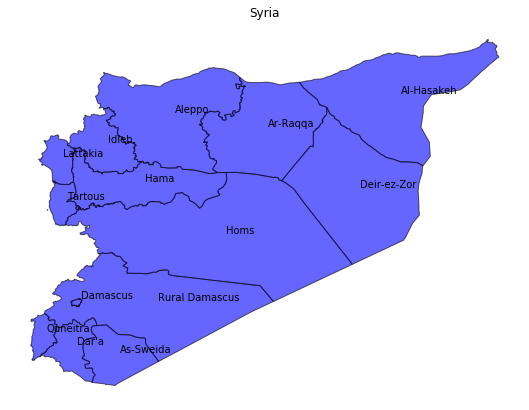

In [13]:
draw_admin("Syria", AdminStratas["Syria"], figsize = (10, 7), annotation = True)

- **Burkina Faso**: Burkina Faso is divided into 13 administrative regions. The rainfall dataframe has the values of all 13 regions.

In [14]:
print(AdminStratas["Burkina Faso"].shape)
AdminStratas["Burkina Faso"]

(13,)


array(['Boucle-Du-Mouhoun', 'Cascades', 'Centre', 'Centre-Est',
       'Centre-Nord', 'Centre-Ouest', 'Centre-Sud', 'Est',
       'Hauts-Bassins', 'Nord', 'Plateau-Central', 'Sahel', 'Sud-Ouest'],
      dtype=object)

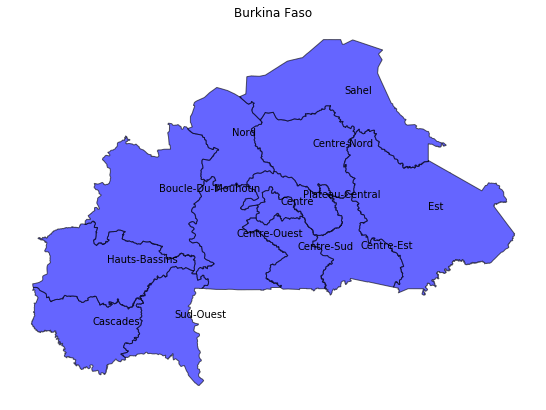

In [15]:
draw_admin("Burkina Faso", AdminStratas["Burkina Faso"], figsize = (10, 7), annotation = True)

In [16]:
# Convert the dekad to proper pandas datetime format.
# These correspond to the calendar dates 1-10, 11-20, and 21-end of each month.
def dekad_to_day(row):
    date = pd.to_datetime(str(row["Year"]) + "-" + str(row["Month"]) + "-01")
    end_month = date.days_in_month
    dekad = row.Dekad   
    if dekad == 1:
        return 10
    if dekad == 2:
        return 20
    if dekad == 3:
        return end_month
    
df["Day"] = df.apply(dekad_to_day, axis = 1)
df.drop(columns = "Dekad", inplace = True)
data = pd.to_datetime(df[["Year", "Month", "Day"]])
df.insert(1, "Datetime", data)
df.drop(["Year", "Month", "Day"], axis = 1, inplace = True)
df.sort_values("Datetime", ascending = True, inplace = True) 
df = df.groupby(["Country", "AdminStrata"]).apply(lambda group: group.set_index("Datetime").resample("D").mean()).reset_index()
df.reset_index(drop = True, inplace = True)
df.head()

,Country,AdminStrata,Datetime,Rainfall (mm),Average (mm)
0,Burkina Faso,Boucle-Du-Mouhoun,2014-01-10,0.0,0.0
1,Burkina Faso,Boucle-Du-Mouhoun,2014-01-11,NaN,NaN
2,Burkina Faso,Boucle-Du-Mouhoun,2014-01-12,NaN,NaN
3,Burkina Faso,Boucle-Du-Mouhoun,2014-01-13,NaN,NaN
4,Burkina Faso,Boucle-Du-Mouhoun,2014-01-14,NaN,NaN


In [17]:
# Create a dataframe with multi-column in order to have a summary dataframe of the time-series.
df.drop(labels = ["Average (mm)"], axis = 1, inplace = True)
df = df.set_index(["Datetime", "Country", "AdminStrata"]).unstack(["Country", "AdminStrata"])
df.columns = df.columns.droplevel(0)
df.columns = pd.MultiIndex.from_tuples(list(map(lambda x: tuple([x[0], x[1], "Rainfall (mm)"]), df.columns)))
df.columns.rename("Country", level = 0, inplace = True)
df.columns.rename("AdminStrata", level = 1, inplace = True)
df.columns.rename("Indicator", level = 2, inplace = True)
freq = "D"
df.index.freq = freq

In [18]:
# Select data between a temporal range.
df = df.loc[(df.index >= "2014-01-10") & (df.index <= "2020-03-10")]
df.head()

Country          Burkina Faso                                            \
AdminStrata Boucle-Du-Mouhoun      Cascades        Centre    Centre-Est   
Indicator       Rainfall (mm) Rainfall (mm) Rainfall (mm) Rainfall (mm)   
Datetime                                                                  
2014-01-10                0.0         0.028           0.0           0.0   
2014-01-11                NaN           NaN           NaN           NaN   
2014-01-12                NaN           NaN           NaN           NaN   
2014-01-13                NaN           NaN           NaN           NaN   
2014-01-14                NaN           NaN           NaN           NaN   

Country                                                              \
AdminStrata   Centre-Nord  Centre-Ouest    Centre-Sud           Est   
Indicator   Rainfall (mm) Rainfall (mm) Rainfall (mm) Rainfall (mm)   
Datetime                                                              
2014-01-10            0.0           0.0           0.0           0.0   
2014-01-11            NaN           NaN           NaN           NaN   
2014-01-12            NaN           NaN           NaN           NaN   
2014-01-13            NaN           NaN           NaN           NaN   
2014-01-14            NaN           NaN           NaN           NaN   

Country                                  ...         Yemen                \
AdminStrata Hauts-Bassins          Nord  ...        Hajjah           Ibb   
Indicator   Rainfall (mm) Rainfall (mm)  ... Rainfall (mm) Rainfall (mm)   
Datetime                                 ...                               
2014-01-10          0.001           0.0  ...         0.968         0.631   
2014-01-11            NaN           NaN  ...           NaN           NaN   
2014-01-12            NaN           NaN  ...           NaN           NaN   
2014-01-13            NaN           NaN  ...           NaN           NaN   
2014-01-14            NaN           NaN  ...           NaN           NaN   

Country                                                              \
AdminStrata          Lahj         Marib        Raymah        Sa'ada   
Indicator   Rainfall (mm) Rainfall (mm) Rainfall (mm) Rainfall (mm)   
Datetime                                                              
2014-01-10          0.681         1.757           0.0         0.794   
2014-01-11            NaN           NaN           NaN           NaN   
2014-01-12            NaN           NaN           NaN           NaN   
2014-01-13            NaN           NaN           NaN           NaN   
2014-01-14            NaN           NaN           NaN           NaN   

Country                                                              
AdminStrata        Sana'a       Shabwah       Socotra         Taizz  
Indicator   Rainfall (mm) Rainfall (mm) Rainfall (mm) Rainfall (mm)  
Datetime                                                             
2014-01-10           0.57         1.684         1.127         0.771  
2014-01-11            NaN           NaN           NaN           NaN  
2014-01-12            NaN           NaN           NaN           NaN  
2014-01-13            NaN           NaN           NaN           NaN  
2014-01-14            NaN           NaN           NaN           NaN  

[5 rows x 49 columns]

In [19]:
# Now check if it is necessary interolate the nan values of the datetime dekadly.
df = df.loc[(df.index.day == 10) | (df.index.day == 20) | (df.index.is_month_end)]
# Keep dataframe from first to end valid index based on the measured rainfall.
first_idx = df.first_valid_index()
last_idx = df.last_valid_index()
df = df.loc[first_idx:last_idx]
# Check if the dataframe contains NaN values in correspondence of the dekades.
print("Check if the dataframe contains NaN values:")
df.isnull().sum()

Check if the dataframe contains NaN values:


Country       AdminStrata        Indicator    
Burkina Faso  Boucle-Du-Mouhoun  Rainfall (mm)    0
              Cascades           Rainfall (mm)    0
              Centre             Rainfall (mm)    0
              Centre-Est         Rainfall (mm)    0
              Centre-Nord        Rainfall (mm)    0
              Centre-Ouest       Rainfall (mm)    0
              Centre-Sud         Rainfall (mm)    0
              Est                Rainfall (mm)    0
              Hauts-Bassins      Rainfall (mm)    0
              Nord               Rainfall (mm)    0
              Plateau-Central    Rainfall (mm)    0
              Sahel              Rainfall (mm)    0
              Sud-Ouest          Rainfall (mm)    0
Syria         Al-Hasakeh         Rainfall (mm)    0
              Aleppo             Rainfall (mm)    0
              Ar-Raqqa           Rainfall (mm)    0
              As-Sweida          Rainfall (mm)    0
              Damascus           Rainfall (mm)    0
              Dar

In [20]:
# Resample data to daily level (as before).
df = df.resample("D").mean()
df.head()

Country          Burkina Faso                                            \
AdminStrata Boucle-Du-Mouhoun      Cascades        Centre    Centre-Est   
Indicator       Rainfall (mm) Rainfall (mm) Rainfall (mm) Rainfall (mm)   
Datetime                                                                  
2014-01-10                0.0         0.028           0.0           0.0   
2014-01-11                NaN           NaN           NaN           NaN   
2014-01-12                NaN           NaN           NaN           NaN   
2014-01-13                NaN           NaN           NaN           NaN   
2014-01-14                NaN           NaN           NaN           NaN   

Country                                                              \
AdminStrata   Centre-Nord  Centre-Ouest    Centre-Sud           Est   
Indicator   Rainfall (mm) Rainfall (mm) Rainfall (mm) Rainfall (mm)   
Datetime                                                              
2014-01-10            0.0           0.0           0.0           0.0   
2014-01-11            NaN           NaN           NaN           NaN   
2014-01-12            NaN           NaN           NaN           NaN   
2014-01-13            NaN           NaN           NaN           NaN   
2014-01-14            NaN           NaN           NaN           NaN   

Country                                  ...         Yemen                \
AdminStrata Hauts-Bassins          Nord  ...        Hajjah           Ibb   
Indicator   Rainfall (mm) Rainfall (mm)  ... Rainfall (mm) Rainfall (mm)   
Datetime                                 ...                               
2014-01-10          0.001           0.0  ...         0.968         0.631   
2014-01-11            NaN           NaN  ...           NaN           NaN   
2014-01-12            NaN           NaN  ...           NaN           NaN   
2014-01-13            NaN           NaN  ...           NaN           NaN   
2014-01-14            NaN           NaN  ...           NaN           NaN   

Country                                                              \
AdminStrata          Lahj         Marib        Raymah        Sa'ada   
Indicator   Rainfall (mm) Rainfall (mm) Rainfall (mm) Rainfall (mm)   
Datetime                                                              
2014-01-10          0.681         1.757           0.0         0.794   
2014-01-11            NaN           NaN           NaN           NaN   
2014-01-12            NaN           NaN           NaN           NaN   
2014-01-13            NaN           NaN           NaN           NaN   
2014-01-14            NaN           NaN           NaN           NaN   

Country                                                              
AdminStrata        Sana'a       Shabwah       Socotra         Taizz  
Indicator   Rainfall (mm) Rainfall (mm) Rainfall (mm) Rainfall (mm)  
Datetime                                                             
2014-01-10           0.57         1.684         1.127         0.771  
2014-01-11            NaN           NaN           NaN           NaN  
2014-01-12            NaN           NaN           NaN           NaN  
2014-01-13            NaN           NaN           NaN           NaN  
2014-01-14            NaN           NaN           NaN           NaN  

[5 rows x 49 columns]

## Reproduce the wfp visualization platform

In [21]:
plot_hist(df, title = "Rainfall (mm)", yaxis = "Rainfall (mm)")

Output()

## Resampling month granularity

Create a time-series for the rainfall data. The first time-series are created with a month granularity taking the sum of the amount of rainfall happened in the corresponding month.

In [22]:
# Group the time monthly taking the sum of the results.
df_month = df.resample("M").sum()
df_month.head()

Country          Burkina Faso                                            \
AdminStrata Boucle-Du-Mouhoun      Cascades        Centre    Centre-Est   
Indicator       Rainfall (mm) Rainfall (mm) Rainfall (mm) Rainfall (mm)   
Datetime                                                                  
2014-01-31              0.000         0.270         0.000         0.000   
2014-02-28              0.003         1.632         0.000         0.051   
2014-03-31              4.812        34.353         3.081        11.249   
2014-04-30             15.347        72.943        21.143        39.321   
2014-05-31             40.923        80.924        63.408        60.831   

Country                                                              \
AdminStrata   Centre-Nord  Centre-Ouest    Centre-Sud           Est   
Indicator   Rainfall (mm) Rainfall (mm) Rainfall (mm) Rainfall (mm)   
Datetime                                                              
2014-01-31          0.000         0.000         0.000         0.001   
2014-02-28          0.000         0.001         0.006         0.005   
2014-03-31          0.462        10.317        11.425         3.481   
2014-04-30          6.611        28.308        32.766        27.518   
2014-05-31         61.694        57.628        56.258        53.400   

Country                                  ...         Yemen                \
AdminStrata Hauts-Bassins          Nord  ...        Hajjah           Ibb   
Indicator   Rainfall (mm) Rainfall (mm)  ... Rainfall (mm) Rainfall (mm)   
Datetime                                 ...                               
2014-01-31          0.003         0.000  ...         2.975         1.469   
2014-02-28          0.148         0.000  ...         4.543         3.737   
2014-03-31         19.109         0.415  ...         7.390         4.106   
2014-04-30         43.732         3.642  ...        18.025        22.475   
2014-05-31         59.633        52.160  ...        17.336        37.525   

Country                                                              \
AdminStrata          Lahj         Marib        Raymah        Sa'ada   
Indicator   Rainfall (mm) Rainfall (mm) Rainfall (mm) Rainfall (mm)   
Datetime                                                              
2014-01-31          1.902         5.342         0.905         2.625   
2014-02-28          4.793         4.058         4.555         4.116   
2014-03-31          4.095         4.291         3.794        13.599   
2014-04-30          5.574         6.297        24.191        13.139   
2014-05-31         12.430         2.207        39.556        17.854   

Country                                                              
AdminStrata        Sana'a       Shabwah       Socotra         Taizz  
Indicator   Rainfall (mm) Rainfall (mm) Rainfall (mm) Rainfall (mm)  
Datetime                                                             
2014-01-31          2.117         4.719         1.135         2.491  
2014-02-28          3.005         3.442         0.167         5.306  
2014-03-31          2.017         7.854         0.437         6.059  
2014-04-30         14.375         5.120         1.524         9.652  
2014-05-31         16.244         1.770         0.111        26.785  

[5 rows x 49 columns]

In [23]:
plot(df_month, title = "Rainfall", yaxis = "Rainfall (mm)", style = "lines+markers")

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Syria', 'Yemen'), value='…

In [24]:
# Now save the time-series of each country keeping as indeces the own first and last index.
def save(group, name):
    country = group.name
    group = group[country]
    # Adjust time-series group.
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Save.
    group.to_csv(path_to_save_data + country + "/" + name + ".csv", index_label = False)

In [25]:
# Save the dataframe.
_ = df_month.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_rainfall-monthly"))

## Day granularity

I get the dataframe with time step of the day filling nan values (because I have information only for the dekades of the month) with previous value dekad. More precisely, being the values of the dekaed the tototal amount of rainfall happened in that interval I divide for the days of the range of the dekad.

In [26]:
# I get the dataframe with time step of the day filling nan values with previous value dekad.
df_fit = df.fillna(method = "bfill")
freq = "D"
df_fit.index.freq = freq
# Furthermore, being the values of the dekaed the tot rainfall happened in that interval I divide for the days of the range of the dekad.
def dekad_day_norm(row):
    if row.name.day >= 1 or row.name.day <= 10:
        return row/10
    if row.name.day >= 11 or row.name.day <= 20:
        return row/10
    if row.name.day >= 21:
        return row/row.name.days_in_month - 20

df_fit = df_fit.apply(dekad_day_norm, axis = 1)
df_fit.head()

Country          Burkina Faso                                            \
AdminStrata Boucle-Du-Mouhoun      Cascades        Centre    Centre-Est   
Indicator       Rainfall (mm) Rainfall (mm) Rainfall (mm) Rainfall (mm)   
Datetime                                                                  
2014-01-10                0.0        0.0028           0.0           0.0   
2014-01-11                0.0        0.0028           0.0           0.0   
2014-01-12                0.0        0.0028           0.0           0.0   
2014-01-13                0.0        0.0028           0.0           0.0   
2014-01-14                0.0        0.0028           0.0           0.0   

Country                                                              \
AdminStrata   Centre-Nord  Centre-Ouest    Centre-Sud           Est   
Indicator   Rainfall (mm) Rainfall (mm) Rainfall (mm) Rainfall (mm)   
Datetime                                                              
2014-01-10            0.0           0.0           0.0           0.0   
2014-01-11            0.0           0.0           0.0           0.0   
2014-01-12            0.0           0.0           0.0           0.0   
2014-01-13            0.0           0.0           0.0           0.0   
2014-01-14            0.0           0.0           0.0           0.0   

Country                                  ...         Yemen                \
AdminStrata Hauts-Bassins          Nord  ...        Hajjah           Ibb   
Indicator   Rainfall (mm) Rainfall (mm)  ... Rainfall (mm) Rainfall (mm)   
Datetime                                 ...                               
2014-01-10         0.0001           0.0  ...        0.0968        0.0631   
2014-01-11         0.0001           0.0  ...        0.0968        0.0296   
2014-01-12         0.0001           0.0  ...        0.0968        0.0296   
2014-01-13         0.0001           0.0  ...        0.0968        0.0296   
2014-01-14         0.0001           0.0  ...        0.0968        0.0296   

Country                                                              \
AdminStrata          Lahj         Marib        Raymah        Sa'ada   
Indicator   Rainfall (mm) Rainfall (mm) Rainfall (mm) Rainfall (mm)   
Datetime                                                              
2014-01-10         0.0681        0.1757           0.0        0.0794   
2014-01-11         0.0381        0.1784           0.0        0.0836   
2014-01-12         0.0381        0.1784           0.0        0.0836   
2014-01-13         0.0381        0.1784           0.0        0.0836   
2014-01-14         0.0381        0.1784           0.0        0.0836   

Country                                                              
AdminStrata        Sana'a       Shabwah       Socotra         Taizz  
Indicator   Rainfall (mm) Rainfall (mm) Rainfall (mm) Rainfall (mm)  
Datetime                                                             
2014-01-10         0.0570        0.1684        0.1127        0.0771  
2014-01-11         0.0744        0.1368        0.0008        0.0637  
2014-01-12         0.0744        0.1368        0.0008        0.0637  
2014-01-13         0.0744        0.1368        0.0008        0.0637  
2014-01-14         0.0744        0.1368        0.0008        0.0637  

[5 rows x 49 columns]

In [27]:
plot(df_fit, title = "Rainfall", yaxis = "Rainfall (mm)")

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Syria', 'Yemen'), value='…

In [28]:
# Save the dataframe.
_ = df_fit.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_rainfall-daily"))